<a href="https://colab.research.google.com/github/vainaijr/comic-character-detection/blob/master/Copy_of_dog_elephant_classification_keras_vgg16_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import numpy as np
import tensorflow as tf
import keras
from scipy import misc, ndimage
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train_path = 'drive/My Drive/Colab Notebooks/dataset/train'
valid_path = 'drive/My Drive/Colab Notebooks/dataset/validate'
test_path = 'drive/My Drive/Colab Notebooks/dataset/test'

In [189]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dog', 'elephant', 'giraffe', 'guitar', 'horse', 'house', 'person'], class_mode='categorical')
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dog', 'elephant', 'giraffe', 'guitar', 'horse', 'house', 'person'], class_mode='categorical', batch_size = 10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dog', 'elephant', 'giraffe', 'guitar', 'horse', 'house', 'person'], class_mode='categorical', batch_size = 10)

Found 1920 images belonging to 7 classes.
Found 213 images belonging to 7 classes.
Found 211 images belonging to 7 classes.


In [0]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
train_images, train_labels = next(train_batches)
test_images, test_labels = next(test_batches)
valid_images, valid_labels = next(valid_batches)

In [192]:
train_images.shape


(32, 224, 224, 3)

In [193]:
test_images.shape


(10, 224, 224, 3)

In [194]:
valid_images.shape

(10, 224, 224, 3)

In [195]:
len(train_labels)

32

In [196]:
len(test_labels)

10

In [197]:
len(valid_labels)

10

In [0]:
train_labels = train_labels.argmax(axis=1)

In [0]:
test_labels = test_labels.argmax(axis=1)

In [0]:
valid_labels = valid_labels.argmax(axis=1)

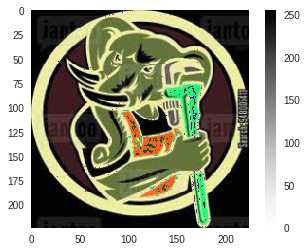

In [201]:
#plots(imgs, titles=labels.argmax(axis=1))

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

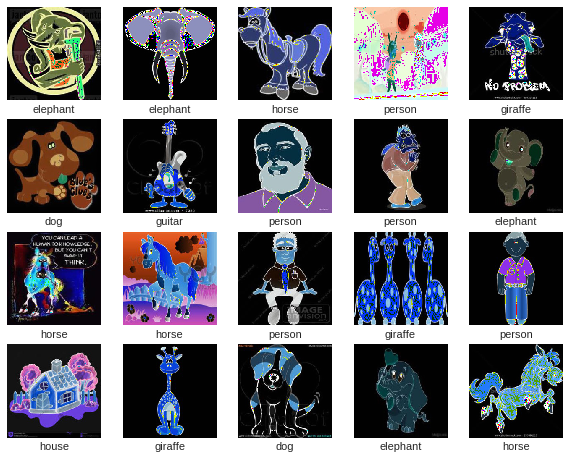

In [202]:
class_names = ['dog', 'elephant', 'giraffe', 'guitar', 'horse', 'house', 'person']
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
#model_one = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)),
#                   Flatten(),
#                   Dense(7, activation='softmax'),
#                ])

In [0]:
#model_one.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#model_one.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

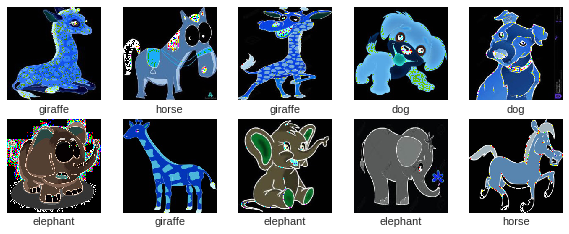

In [206]:
#test_images, test_labels = next(test_batches)
#test_labels = test_labels.argmax(axis=1)

#plots(test_imgs, titles=test_labels)
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])

In [207]:
#test_labels = test_labels[:, 0]
test_labels

array([2, 4, 2, 0, 0, 1, 2, 1, 1, 4])

In [0]:
#predictions = model_one.predict_generator(test_batches, steps=1, verbose=2)

In [0]:
#predictions = model_one.predict(test_images)

In [0]:
#predictions[0]

In [0]:
#plt.figure(figsize=(10,10))
#for i in range(10):
#    plt.subplot(5,5,i+1)
#    plt.xticks([])
#    plt.yticks([])
#    plt.grid(False)
#    plt.imshow(test_images[i], cmap=plt.cm.binary)
#    plt.xlabel(class_names[predictions.argmax(axis=1)[i]])

In [0]:

#class_names[np.argmax(predictions[0])]

In [0]:
#class_names[test_labels[0]]

In [0]:
#class_names[np.argmax(predictions[0])]

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(7), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
#i = 1
#plt.figure(figsize=(6,3))
#plt.subplot(1,2,1)
#plot_image(i, predictions, test_labels, test_images)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions, test_labels)

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
#num_rows = 5
#num_cols = 2
#num_images = num_rows*num_cols
#plt.figure(figsize=(2*2*num_cols, 2*num_rows))
#for i in range(num_images):
#  plt.subplot(num_rows, 2*num_cols, 2*i+1)
#  plot_image(i, predictions, test_labels, test_images)
#  plt.subplot(num_rows, 2*num_cols, 2*i+2)
#  plot_value_array(i, predictions, test_labels)

In [0]:
#cm = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [0]:
#cm_plot_labels = ['dog', 'elephant', 'giraffe', 'guitar', 'horse', 'house', 'person']
#plot_confusion_matrix(cm, cm_plot_labels, title = 'Confusion Matrix')

In [0]:
vgg16_model = keras.applications.vgg16.VGG16()

In [222]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [223]:
type(vgg16_model)

keras.engine.training.Model

In [0]:
model_two = Sequential()
for layer in vgg16_model.layers[:-1]:
    convout = layer
    model_two.add(layer)

In [225]:
model_two.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [0]:
for layer in model_two.layers:
    layer.trainable = False

In [0]:
model_two.add(Dense(256, activation='relu'))
model_two.add(Dense(7, activation='softmax'))

In [0]:
model_two.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [229]:
model_two.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [230]:
model_two.fit_generator(train_batches, steps_per_epoch=60, validation_data=valid_batches, validation_steps=21, epochs=100, verbose=2)

Epoch 1/100
 - 21s - loss: 1.1250 - acc: 0.5896 - val_loss: 0.5470 - val_acc: 0.7882
Epoch 2/100
 - 20s - loss: 0.5206 - acc: 0.8229 - val_loss: 0.4232 - val_acc: 0.8333
Epoch 3/100
 - 20s - loss: 0.3445 - acc: 0.8875 - val_loss: 0.4073 - val_acc: 0.8276
Epoch 4/100
 - 20s - loss: 0.2425 - acc: 0.9328 - val_loss: 0.3683 - val_acc: 0.8621
Epoch 5/100
 - 20s - loss: 0.1916 - acc: 0.9557 - val_loss: 0.2986 - val_acc: 0.8916
Epoch 6/100
 - 20s - loss: 0.1375 - acc: 0.9766 - val_loss: 0.3090 - val_acc: 0.8867
Epoch 7/100
 - 20s - loss: 0.1057 - acc: 0.9875 - val_loss: 0.3579 - val_acc: 0.8670
Epoch 8/100
 - 20s - loss: 0.0827 - acc: 0.9927 - val_loss: 0.2391 - val_acc: 0.8966
Epoch 9/100
 - 20s - loss: 0.0672 - acc: 0.9964 - val_loss: 0.2561 - val_acc: 0.8966
Epoch 10/100
 - 20s - loss: 0.0544 - acc: 0.9979 - val_loss: 0.2976 - val_acc: 0.9064
Epoch 11/100
 - 20s - loss: 0.0463 - acc: 0.9979 - val_loss: 0.2760 - val_acc: 0.8818
Epoch 12/100
 - 20s - loss: 0.0387 - acc: 0.9995 - val_loss: 0.

In [0]:
#test_images, test_labels = next(test_batches)
#plots(test_images, titles=class_names[test_labels.argmax(axis=1)])

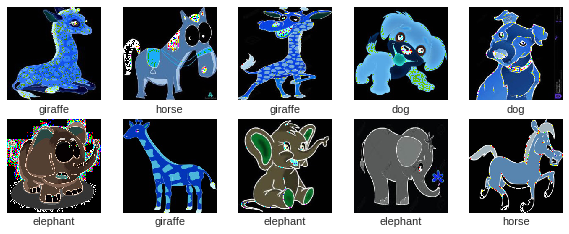

In [231]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])

In [232]:
#test_labels = test_labels[:, 0]
test_labels

array([2, 4, 2, 0, 0, 1, 2, 1, 1, 4])

In [0]:
test_batches.reset()

In [0]:
test_images, test_labels = next(test_batches)

In [0]:
predictions_two = model_two.predict(test_images, verbose=0)


In [0]:
test_labels = test_labels.argmax(1)

In [237]:
predictions_two.argmax(1)

array([6, 6, 2, 2, 1, 4, 2, 0, 1, 6])

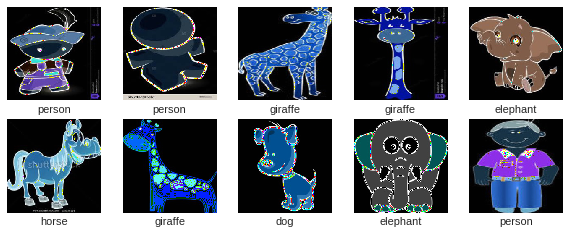

In [238]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[predictions_two.argmax(axis=1)[i]])

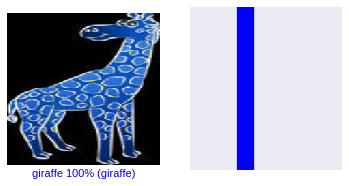

In [239]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_two, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_two,  test_labels)

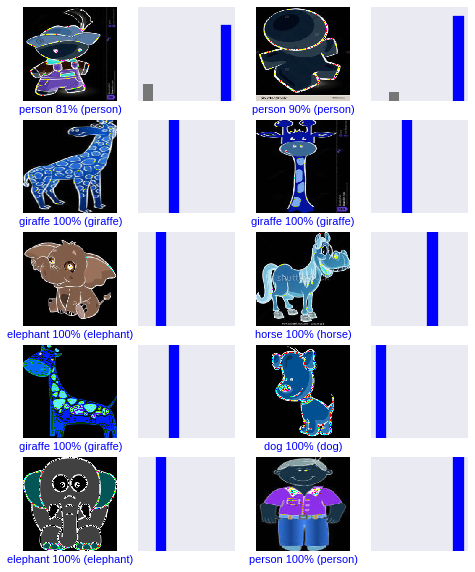

In [240]:

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_two, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_two, test_labels)

In [241]:
cm = confusion_matrix(test_labels.argmax(axis=1), np.round(predictions.argmax(axis=1)))

AxisError: ignored

Confusion matrix, without normalization
[[2 0 0 0 1 0 0]
 [0 1 1 0 0 0 0]
 [1 1 0 0 0 1 0]
 [1 0 0 0 0 0 0]
 [1 0 0 2 0 0 1]
 [0 1 2 0 0 0 0]
 [0 0 1 0 0 1 2]]


array([[1.19070448e-02, 2.18292480e-05, 9.86396611e-01, 1.01686019e-04,
        1.16519793e-03, 1.44081714e-04, 2.63481430e-04],
       [3.89732304e-05, 2.20163056e-05, 1.07699496e-04, 1.08947570e-05,
        1.32807239e-04, 7.87531317e-04, 9.98900056e-01],
       [3.12473421e-05, 1.07829169e-06, 1.17166193e-04, 9.99688148e-01,
        1.57184972e-04, 4.96914026e-07, 4.75603611e-06],
       [7.52281070e-01, 9.05425176e-02, 3.05498522e-02, 3.19852232e-04,
        1.22337028e-01, 1.91887910e-03, 2.05083215e-03],
       [4.06685052e-04, 2.04327389e-05, 2.54665148e-02, 5.57671010e-04,
        3.96195537e-04, 9.63028908e-01, 1.01235341e-02],
       [4.12352383e-01, 2.44164094e-01, 1.25824110e-04, 3.69656133e-04,
        3.42907429e-01, 3.36004377e-05, 4.69969091e-05],
       [3.03000503e-04, 2.64306727e-04, 9.98509586e-01, 5.16091541e-06,
        8.46338924e-04, 5.84605414e-06, 6.57861165e-05],
       [1.37022555e-01, 3.08769532e-02, 6.41890988e-02, 4.49187355e-03,
        5.85659482e-02, 1

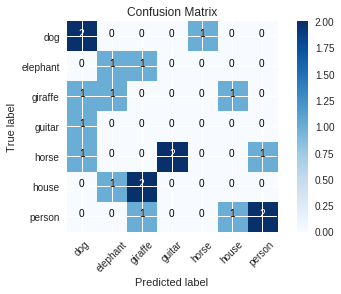

In [47]:
cm_plot_labels = ['dog', 'elephant', 'giraffe', 'guitar', 'horse', 'house', 'person']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')
test_labels
predictions

In [53]:
len(test_labels)

20

In [34]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
plt.imshow(ims[i], interpolation=None if interp else 'none')

NameError: ignored

In [0]:
plot_images(images=test_images, cls_true=test_labels, smooth=True)

In [0]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, channel_shift_range=10., horizontal_flip=True)

In [0]:
image_path='train/dog/pic_071.jpg'

In [0]:
image = np.expand_dims(ndimage.imread(image_path),0)
plt.imshow(image[0])

In [0]:
aug_iter = gen.flow(image)

In [0]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

In [0]:
plots(aug_images, figsize=(20, 7), rows=2)

In [0]:
test_batches.class_indices #the index where one is

In [0]:
model.layers[0].get_config() # view details of intermediate layers

In [0]:
model.count_params() #total number of parameters in the model

In [0]:
model.layers[0].count_params() #number of parameters in intermediate layers

In [0]:
model.layers[2].count_params()

In [0]:
def plot_filters(layer, x, y):
    filters = layer.W.get_value()
    fig = plt.figure()
    for j in range(len(filters)):
        ax = fig.add_subplot(y, x, j+1)
        ax.matshow(filters[j][0], cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.tight_layout()
    return plt


In [0]:
plot_filters(model.layers[3],8,4)


In [0]:
model.layers[0].kernel